### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

### Set-up

In [2]:
# we will read the dataset that we created in the previous exercise
df = pd.read_csv("DSD_Features.csv", encoding='ISO-8859-1')
df.head()

,CustStorItemTriadID,BaseorderID,Createdate,RecDeliveryDate,CategoryID,OaMasterDistributorID,ConversionFactor,InventoryChange,ActualScans,ForecastedScans,...,Reviewed,IncInAnom,PrevDeliveryDate,PrevShippedQty,ActualShipped,QuantOneOrderAgo,last_baseorder,lead_time,new_client,skipped_ship
0,13761530,1867926,2020-05-01,2020-05-07,1,5,0.75,12,0,13,...,1,1,2020-05-04,13.0,0.0,18.0,NaN,6,0,1.0
1,13766672,1862453,2020-05-01,2020-05-06,1,5,0.75,4,0,4,...,0,0,2020-05-02,2.0,9.0,9.0,NaN,5,0,1.0
2,13771739,1867825,2020-05-01,2020-05-07,1,5,0.75,37,0,43,...,0,1,2020-05-04,32.0,0.0,64.0,NaN,6,0,1.0
3,13772017,1860527,2020-05-01,2020-05-05,1,5,0.75,9,0,18,...,0,1,2020-05-01,16.0,16.0,16.0,NaN,4,0,1.0
4,13774001,1863282,2020-05-01,2020-05-05,1,5,0.75,0,0,0,...,1,1,2020-04-30,0.0,0.0,0.0,NaN,4,0,0.0


In [3]:
#also try Operator Adjustments as potential target
target = 'PropOrderQty'

## Linear Regression

### Set-up X and y

In [47]:
y = np.asarray(df[target])
y = np.reshape(y,(y.shape[0],1))
X = df.drop(['CustStorItemTriadID','BaseorderID','Createdate','ModelUsed','RecDeliveryDate',
             'ConversionFactor','Previous2DelDate','MaxScanDate','MaxShipDate','Reviewed','IncInAnom',
            'PrevDeliveryDate'], axis = 1).drop(target, axis=1).fillna(0)

#drop rows that have a null in any column
X.shape,y.shape
#df.isna().sum()

((495602, 24), (495602, 1))

In [16]:
#Establish training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=314)

len(X_train), len(X_test), len(y_test), len(y_train)

(247801, 247801, 247801, 247801)

In [17]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [11]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.79
Mean squared error = 2.44
Median absolute error = 0.3
Explain variance score = 0.94
R2 score = 0.94


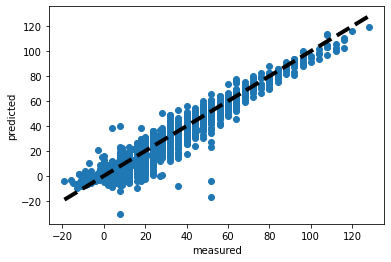

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

Feature: 0, Score: 0.00685
Feature: 1, Score: 0.01757
Feature: 2, Score: 0.00226
Feature: 3, Score: 0.18546
Feature: 4, Score: 0.25840
Feature: 5, Score: 0.70880
Feature: 6, Score: 0.84170
Feature: 7, Score: 5.70197
Feature: 8, Score: -1.70401
Feature: 9, Score: 0.74579
Feature: 10, Score: 0.01411
Feature: 11, Score: -0.16895
Feature: 12, Score: -0.01592
Feature: 13, Score: 0.00135
Feature: 14, Score: -0.05309
Feature: 15, Score: 0.01864
Feature: 16, Score: -0.00425
Feature: 17, Score: -0.00331
Feature: 18, Score: 0.00767
Feature: 19, Score: 0.04341
Feature: 20, Score: -0.00485
Feature: 21, Score: 0.02167
Feature: 22, Score: -0.57816
Feature: 23, Score: -0.31614


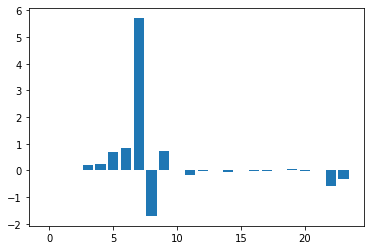

In [133]:
#Determine which features are most important to the model
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [113]:
X.columns

Index(['CategoryID', 'OaMasterDistributorID', 'InventoryChange', 'ActualScans',
       'ForecastedScans', 'WeightData', 'BaseOrder', 'SlowMoving', 'TooBig',
       'TrueUpAdjQty', 'TUAIssue', 'OriginalPropOrderQty', 'ConversionUnits',
       'MaxDeliveredQty', 'ConversionResidual', 'TwoOrderAgo',
       'QtyShippedTwoOrderAgo', 'PrevShippedQty', 'ActualShipped',
       'QuantOneOrderAgo', 'last_baseorder', 'lead_time', 'new_client',
       'skipped_ship'],
      dtype='object')

## Neural Networks

In [18]:
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

In [51]:
# Create model
model = Sequential()
model.add(Dense(27, activation="relu", input_dim=X.shape[1]))
model.add(Dense(14, activation="relu"))
model.add(Dense(1))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, batch_size=1000, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)


Epoch 1/250
248/248 - 1s - loss: 6.1458 - val_loss: 3.1093
Epoch 2/250
248/248 - 0s - loss: 2.8603 - val_loss: 2.6499
Epoch 3/250
248/248 - 0s - loss: 2.5345 - val_loss: 2.4200
Epoch 4/250
248/248 - 0s - loss: 2.3739 - val_loss: 2.3305
Epoch 5/250
248/248 - 0s - loss: 2.2796 - val_loss: 2.2746
Epoch 6/250
248/248 - 0s - loss: 2.2188 - val_loss: 2.1806
Epoch 7/250
248/248 - 0s - loss: 2.1638 - val_loss: 2.1345
Epoch 8/250
248/248 - 0s - loss: 2.1186 - val_loss: 2.1001
Epoch 9/250
248/248 - 0s - loss: 2.0816 - val_loss: 2.0813
Epoch 10/250
248/248 - 0s - loss: 2.1254 - val_loss: 2.1149
Epoch 11/250
248/248 - 0s - loss: 2.0705 - val_loss: 2.1393
Epoch 12/250
248/248 - 0s - loss: 2.0757 - val_loss: 2.0146
Epoch 13/250
248/248 - 0s - loss: 2.0115 - val_loss: 2.0087
Epoch 14/250
248/248 - 0s - loss: 1.9894 - val_loss: 2.0640
Epoch 15/250
248/248 - 0s - loss: 2.0049 - val_loss: 1.9801
Epoch 16/250
248/248 - 0s - loss: 1.9574 - val_loss: 1.9252
Epoch 17/250
248/248 - 0s - loss: 1.9498 - val_lo

248/248 - 0s - loss: 1.6661 - val_loss: 1.6931
Epoch 138/250
248/248 - 0s - loss: 1.6752 - val_loss: 1.7032
Epoch 139/250
248/248 - 0s - loss: 1.6631 - val_loss: 1.7393
Epoch 140/250
248/248 - 0s - loss: 1.6619 - val_loss: 1.6995
Epoch 141/250
248/248 - 0s - loss: 1.6640 - val_loss: 1.6967
Epoch 142/250
248/248 - 0s - loss: 1.6594 - val_loss: 1.7094
Epoch 143/250
248/248 - 0s - loss: 1.6593 - val_loss: 1.6904
Epoch 144/250
248/248 - 0s - loss: 1.6577 - val_loss: 1.6899
Epoch 145/250
248/248 - 0s - loss: 1.6561 - val_loss: 1.6973
Epoch 146/250
248/248 - 0s - loss: 1.6586 - val_loss: 1.6822
Epoch 147/250
248/248 - 0s - loss: 1.6561 - val_loss: 1.6829
Epoch 148/250
248/248 - 0s - loss: 1.6590 - val_loss: 1.6846
Epoch 149/250
248/248 - 0s - loss: 1.6630 - val_loss: 1.6864
Epoch 150/250
248/248 - 0s - loss: 1.6534 - val_loss: 1.7199
Epoch 151/250
248/248 - 0s - loss: 1.6501 - val_loss: 1.6808
Epoch 152/250
248/248 - 0s - loss: 1.6615 - val_loss: 1.6902
Epoch 153/250
248/248 - 0s - loss: 1.6

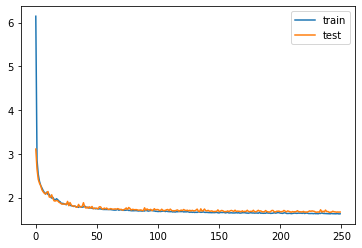

In [52]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [53]:
#Neural Network Model Accuracy
r2_score(y_test,PredValSet)

0.9605648977255615

In [54]:
#Use the below code to see what percent where our predictions fall within 3, 4 or 5 off from actual
#As of Sunday night 98.5, 98.0 and 96.8 percent of predictions are +- 3,4 or 5 of actual.
y_test_vals =np.reshape(y_test,(y_test.shape[0],))
Preds =  np.reshape(PredValSet,(PredValSet.shape[0],))
compare = pd.DataFrame(np.array([y_test_vals, Preds]))

                                 
compare = np.transpose(compare)
compare.to_csv(r'compare1.csv', index = False)

In [ ]:
#def base_model():
#    model = Sequential()
 #   model.add(Dense(27, activation="relu", input_dim=X.shape[1]))
  #  model.add(Dense(14, activation="relu"))
   # model.add(Dense(1))
    #model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))
   # return model

#clf = KerasRegressor(build_fn=base_model, epochs=25, batch_size=5,verbose=0)
#clf.fit(X_train,Y_train)

In [ ]:
## Determine variable importance in model

In [72]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
    model = Sequential()
    model.add(Dense(27, activation="relu", input_dim=X.shape[1]))
    model.add(Dense(14, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200)) 
    return model

my_model = KerasRegressor(build_fn=base_model)    
my_model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10)

perm = PermutationImportance(my_model, random_state=1).fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Epoch 1/10
7744/7744 [==============================] - 7s 870us/step - loss: 3.9126 - val_loss: 2.2899
Epoch 2/10
7744/7744 [==============================] - 7s 874us/step - loss: 2.1430 - val_loss: 1.9668
Epoch 3/10
7744/7744 [==============================] - 6s 835us/step - loss: 2.0276 - val_loss: 2.2775
Epoch 4/10
7744/7744 [==============================] - 6s 835us/step - loss: 1.9699 - val_loss: 1.8944
Epoch 5/10
7744/7744 [==============================] - 6s 839us/step - loss: 1.9225 - val_loss: 1.8011
Epoch 6/10
7744/7744 [==============================] - 6s 837us/step - loss: 1.8135 - val_loss: 1.8115
Epoch 7/10
7744/7744 [==============================] - 7s 849us/step - loss: 1.7846 - val_loss: 1.7812
Epoch 8/10
7744/7744 [==============================] - 7s 852us/step - loss: 1.7881 - val_loss: 1.7883
Epoch 9/10
7744/7744 [==============================] - 7s 841us/step - loss: 1.7992 - val_loss: 1.7435
Epoch 10/10
7744/7744 [==============================] - 3s 376u

7744/7744 [==============================] - 3s 370us/step - loss: 1.7317


Weight,Feature
11.8440 ± 0.0752,OriginalPropOrderQty
5.9569 ± 0.0177,BaseOrder
4.7770 ± 0.0072,ForecastedScans
2.3133 ± 0.0158,TrueUpAdjQty
1.0434 ± 0.0201,SlowMoving
0.4866 ± 0.0111,WeightData
0.4368 ± 0.0050,ConversionUnits
0.1767 ± 0.0074,TwoOrderAgo
0.1649 ± 0.0058,last_baseorder
0.0891 ± 0.0017,ConversionResidual


##gradient boosting

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [327]:
#also try Operator Adjustments as potential target
target = 'Reviewed'

In [328]:
y = np.asarray(linear_df[target])
y = np.reshape(y,(y.shape[0],1))
X = linear_df.drop(target, axis=1)

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=314)

len(X_train), len(X_test)

(247801, 247801)

In [332]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=314)

param_grid = {'n_estimators': [300], 
              'learning_rate': [.025],
              'max_depth': [9],
              'min_samples_leaf': [0.05]}
gbm_rs = RandomizedSearchCV(gbm, param_grid, cv=3, n_iter=100, n_jobs=-1, random_state=314)

gbm_rs.fit(X_train, y_train)
print ('Best GBM Parameters:', gbm_rs.best_params_)

gbm_scores_train = gbm_rs.predict_proba(X_train)[:, 1]
gbm_scores_test = gbm_rs.predict_proba(X_test)[:, 1]

gbm_fpr_train, gbm_tpr_train, _ = roc_curve(y_train, gbm_scores_train)
gbm_fpr_test, gbm_tpr_test, _ = roc_curve(y_test, gbm_scores_test)

/Users/liz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/liz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best GBM Parameters: {'n_estimators': 300, 'min_samples_leaf': 0.05, 'max_depth': 9, 'learning_rate': 0.025}


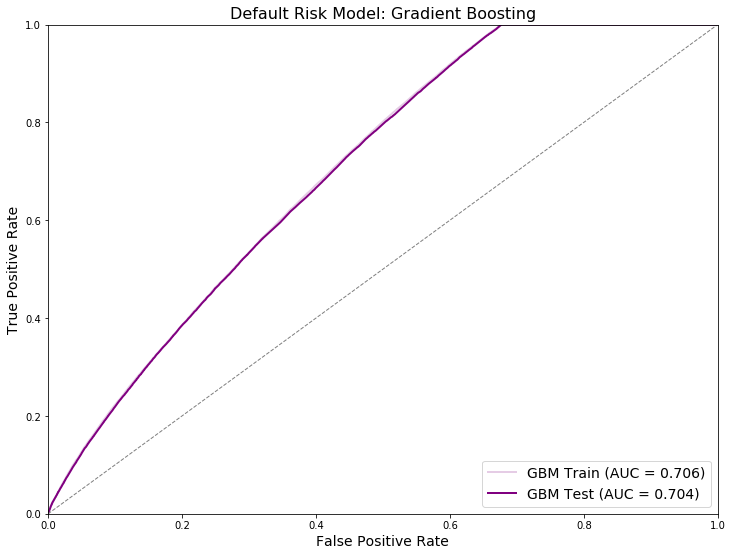

In [333]:
# ROC Curve
#The AUC for the train model is 1, so it is not visible on the chart.
plt.figure().set_size_inches(12, 9)

plt.plot(gbm_fpr_train, gbm_tpr_train, color='purple', lw=2, alpha = 0.2, linestyle = '-',
         label=f'GBM Train (AUC = {roc_auc_score(y_train, gbm_scores_train):0.3f})')

plt.plot(gbm_fpr_test, gbm_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'GBM Test (AUC = {roc_auc_score(y_test, gbm_scores_test):0.3f})')


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Default Risk Model: Gradient Boosting', fontsize = 16)
plt.legend(loc='lower right', fontsize = 14)
plt.show();

In [334]:
gbm_scores_test = gbm_rs.predict_proba(X_test)[:, 1]


roc_auc_score(y_test, gbm_scores_test)

0.7040539762145664

#keras

In [241]:
#also try Operator Adjustments as potential target
target = 'PropOrderQty'

In [242]:
y = np.asarray(linear_df[target])
y = np.reshape(y,(y.shape[0],1))
X = linear_df.drop(target, axis=1)

In [243]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

n_cols = X.shape[1]

In [276]:

model=Sequential()
model.add(Dense(20,activation='relu',input_shape=(n_cols,)))
model.add(Dense(1,activation="linear"))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))
model.fit(X,y,epochs=100, batch_size=100)


Epoch 1/100
4957/4957 [==============================] - 3s 473us/step - loss: 5.2594
Epoch 2/100
4957/4957 [==============================] - 2s 463us/step - loss: 2.1883
Epoch 3/100
4957/4957 [==============================] - 2s 472us/step - loss: 2.1256
Epoch 4/100
4957/4957 [==============================] - 2s 468us/step - loss: 2.0393
Epoch 5/100
4957/4957 [==============================] - 2s 466us/step - loss: 2.0189
Epoch 6/100
4957/4957 [==============================] - 2s 481us/step - loss: 1.9532
Epoch 7/100
4957/4957 [==============================] - 2s 466us/step - loss: 1.9058
Epoch 8/100
4957/4957 [==============================] - 2s 466us/step - loss: 1.9206
Epoch 9/100
4957/4957 [==============================] - 2s 468us/step - loss: 1.9105
Epoch 10/100
4957/4957 [==============================] - 2s 466us/step - loss: 1.8992
Epoch 11/100
4957/4957 [==============================] - 2s 470us/step - loss: 1.8337
Epoch 12/100
4957/4957 [============================

In [277]:
predictions = model.predict(X)

In [267]:
# evaluate the model
scores = model.evaluate(X, y, verbose=0)
scores

1.9170284271240234

In [278]:
r2_score(y,predictions)

0.9594636951717443

In [245]:
#Classifier Neural Network

In [ ]:
#also try Operator Adjustments as potential target
target = 'Reviewed'

In [336]:
from keras.utils.np_utils import to_categorical
y = np.asarray(linear_df[target])
y = to_categorical(y)
X = linear_df.drop(target, axis=1)

X = X.as_matrix()

/Users/liz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=314)

len(X_train), len(X_test)


(247801, 247801)

In [342]:
# Create model
model = Sequential()
model.add(Dense(20, activation="relu", input_dim=20))

# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(2, activation="softmax"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3, decay=1e-3 / 200),metrics=['accuracy'])


# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)


Epoch 1/30
7744/7744 [==============================] - 7s 893us/step - loss: 0.6074 - accuracy: 0.6596 - val_loss: 0.5677 - val_accuracy: 0.6352
Epoch 2/30
7744/7744 [==============================] - 6s 833us/step - loss: 0.5431 - accuracy: 0.6666 - val_loss: 0.5376 - val_accuracy: 0.6723
Epoch 3/30
7744/7744 [==============================] - 7s 871us/step - loss: 0.5382 - accuracy: 0.6693 - val_loss: 0.5547 - val_accuracy: 0.6456
Epoch 4/30
7744/7744 [==============================] - 7s 878us/step - loss: 0.5377 - accuracy: 0.6704 - val_loss: 0.5393 - val_accuracy: 0.6734
Epoch 5/30
7744/7744 [==============================] - 7s 873us/step - loss: 0.5339 - accuracy: 0.6735 - val_loss: 0.5467 - val_accuracy: 0.6727
Epoch 6/30
7744/7744 [==============================] - 7s 876us/step - loss: 0.5345 - accuracy: 0.6746 - val_loss: 0.5412 - val_accuracy: 0.6637
Epoch 7/30
7744/7744 [==============================] - 7s 886us/step - loss: 0.5350 - accuracy: 0.6729 - val_loss: 0.5386 -